In [7]:
########################################################################
#### Python code computing alternating twisted multilayer graphene
# #### 2021/8/26 By Yang Peng (yang.peng@csun.edu)
# ########################################################################

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
        
import numpy as np
# %matplotlib widget
from matplotlib import path
import time
# import ipywidgets as widgets
from joblib import Parallel, delayed
from scipy import linalg
import multiprocessing
import matplotlib as mpl
from numba import jit
# mpl.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.mplot3d.axes3d import Axes3D
# from matplotlib.ticker import LinearLocator, FormatStrFormattera
num_cores = multiprocessing.cpu_count() #import matplotlib.pyplot as plt
%config Completer.use_jedi = False
plt.rcParams.update({'font.size':16})

In [67]:
##########################################################################
#### Run main function ###################################################
if __name__ == "__main__":
    arr = np.loadtxt('potentials.csv',skiprows=1)
    actual_fillinglist = arr[:,0]
    Dfield_list = arr[:,1:6]
    mulist = arr[:,6]
    eta = 60/102
    evenfillinglist = np.zeros(actual_fillinglist.shape)
    oddfillinglist = np.zeros(actual_fillinglist.shape)
    for jj in range(len(actual_fillinglist)):
        oddfillinglist[jj],evenfillinglist[jj] = main(eta,Dfield_list[jj,:],0,actual_fillinglist[jj])
         if 'fig' in locals():
             plt.close(fig)
         fig,ax = main(eta,Dfield_list[jj],mulist[jj],actual_fillinglist[jj])
         filename = "filling_" + "{:.2f}".format(actual_fillinglist[jj]) + ".png"
         fig.savefig(filename,dpi=300)
     Dfield0 = np.zeros(5)
     oddfilling,evenfilling = main(eta,Dfield0,0,0.1)
     if 'fig' in locals():
         plt.close(fig)
     fig,ax = main(eta,Dfield0,0,0)
     fig.savefig("filling_0.png",dpi=300)





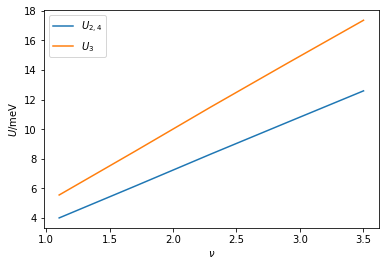

In [2]:
hbar = 1.0546e-34
J_to_meV = 6.242e21  #meV/J
a0 = 2.4595e-10 # lattice constant of Graphene, sqrt(3) of C-C distance
kD = 4*np.pi/(3*a0) # Dirac cone momentum
vF = 0.873534e6 # m/s
######### Define variables ##############################
nL = 5 # number of layers
theta = 1.82/180 * np.pi # alternating angles -theta/2, +theta/2, -theta/2, ..., start from the first layer
ktheta = np.sin(theta/2)*2*kD;
energy_scale = hbar *J_to_meV * vF * ktheta; # energy scale in mev
wAB = 102 # meV
alpha = wAB/energy_scale
if 'fig2' in locals():
    plt.close(fig2)
fig2,ax2 = plt.subplots()
arr = np.loadtxt('potentials.csv',skiprows=2)
actual_fillinglist = arr[:,0]
Dfield_list = arr[:,1:]
ax2.plot(actual_fillinglist,Dfield_list[:,1]*energy_scale,'-',label=r'$U_{2,4}$')
ax2.plot(actual_fillinglist,Dfield_list[:,2]*energy_scale,'-',label=r'$U_3$')
ax2.legend()
ax2.set_ylabel(r'$U/$meV')
ax2.set_xlabel(r'$\nu$')
fig2.savefig('Potentials.png',dpi=300)





In [70]:
collect_filling = np.array([actual_fillinglist,oddfillinglist,evenfillinglist])

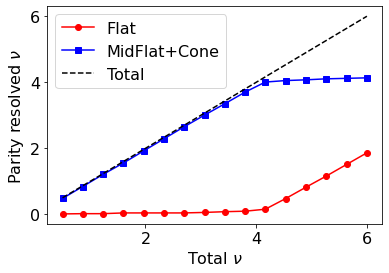

In [91]:
fig,ax = plt.subplots()
ax.plot(collect_filling[0,:],collect_filling[1,:],'r-o',label = 'Flat')
ax.plot(collect_filling[0,:],collect_filling[2,:],'b-s',label = 'MidFlat+Cone')
ax.plot(collect_filling[0,:],collect_filling[0,:],'k--', label = 'Total')
ax.legend()
ax.set_ylabel(r'Parity resolved $\nu$')
ax.set_xlabel(r'Total $\nu$')
fig.savefig('filling.png',dpi=300)
